<a href="https://colab.research.google.com/github/Skevrek/MBA_Thesis/blob/main/OLS_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-1M.xlsx")

In [3]:
df.tail(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
344,2022-09-01,4.039924,4.036574,4.905679,4.125520,4.115780,5.971007,3.837299,4.799914,0.237914,4.987708,4.608036
345,2022-10-01,4.048527,4.039924,4.897674,4.127134,4.115780,5.968196,3.845883,4.799091,0.216884,4.988390,4.607506
346,2022-11-01,4.052446,4.048527,4.982745,4.117410,4.120662,5.972282,3.828641,4.799914,0.186065,4.989752,4.610189
347,2022-12-01,4.053141,4.052446,4.776836,4.109233,4.120662,5.974827,3.808882,4.800737,0.161779,4.991113,4.604340
348,2023-01-01,4.045749,4.053141,4.734916,4.100989,4.120662,5.976351,3.806662,4.805659,0.139936,4.993828,4.586698


In [4]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [5]:
cdf_1M = df[['PPI','PPI_Lagged']]

In [6]:
cdf_1M

,PPI,PPI_Lagged
0,4.656813,4.656813
1,4.657763,4.656813
2,4.657763,4.657763
3,4.658711,4.657763
4,4.657763,4.658711
...,...,...
344,4.039924,4.036574
345,4.048527,4.039924
346,4.052446,4.048527
347,4.053141,4.052446


In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_1M) * 0.7)

# Split the data into training and testing sets
train = cdf_1M[:last_entry]
test = cdf_1M[last_entry:]

# Train the model using OLS regression
train_x = sm.add_constant(np.asanyarray(train.drop(['PPI'], axis=1)))
train_y = np.asanyarray(train[['PPI']])
model = sm.OLS(train_y, train_x)
regr = model.fit()

# The coefficients
print('Intercept: %.8f' % regr.params[0])
print('Coefficients: ', regr.params[1:])

# Evaluate the model on the testing data
test_x = sm.add_constant(np.asanyarray(test.drop(['PPI'], axis=1)))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

Intercept: -0.00009574
Coefficients:  [0.9994731]
Mean absolute error: 0.00359113
Mean squared error: 0.00002278
R2-score: 0.96324529


In [8]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.08053387%
Test MAPE: 0.08914297%


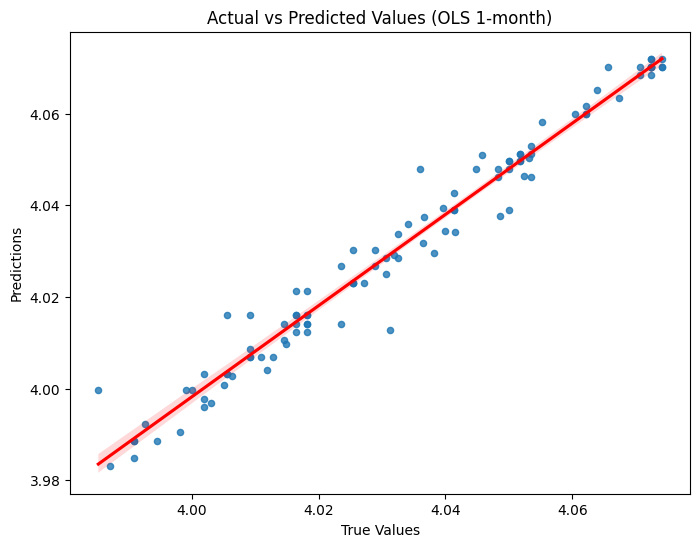

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (OLS 1-month)")
plt.show()

**3 MONTHS**

In [10]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-3M.xlsx")

In [11]:
cdf_3M = df[['PPI','PPI_Lagged','Import_Semis','Employees_Semis','Export_Semis']]

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_3M) * 0.7)

# Split the data into training and testing sets
train = cdf_3M[:last_entry]
test = cdf_3M[last_entry:]

# Train the model using OLS regression
train_x = sm.add_constant(np.asanyarray(train.drop(['PPI'], axis=1)))
train_y = np.asanyarray(train[['PPI']])
model = sm.OLS(train_y, train_x)
regr = model.fit()

# The coefficients
print('Intercept: %.8f' % regr.params[0])
print('Coefficients: ', regr.params[1:])

# Evaluate the model on the testing data
test_x = sm.add_constant(np.asanyarray(test.drop(['PPI'], axis=1)))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

Intercept: 0.05724436
Coefficients:  [ 0.96785793 -0.01279009 -0.00276765  0.03392802]
Mean absolute error: 0.00574335
Mean squared error: 0.00005969
R2-score: 0.90368390


In [13]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.16252398%
Test MAPE: 0.14256627%


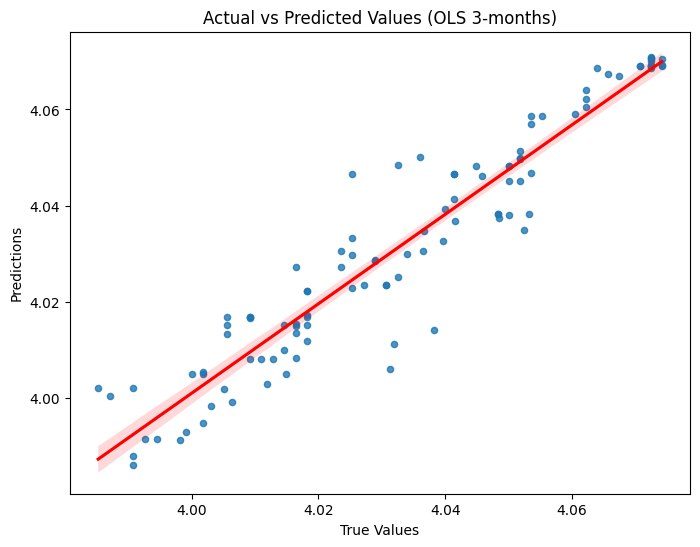

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (OLS 3-months)")
plt.show()

**6-MONTHS**

In [15]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-6M.xlsx")

In [16]:
cdf_6M = df[['PPI','PPI_Lagged','Export_Semis', 'Import_Semis','Employees_Semis']]

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_6M) * 0.8)

# Split the data into training and testing sets
train = cdf_6M[:last_entry]
test = cdf_6M[last_entry:]

# Train the model using OLS regression
train_x = sm.add_constant(np.asanyarray(train.drop(['PPI'], axis=1)))
train_y = np.asanyarray(train[['PPI']])
model = sm.OLS(train_y, train_x)
regr = model.fit()

# The coefficients
print('Intercept: %.8f' % regr.params[0])
print('Coefficients: ', regr.params[1:])

# Evaluate the model on the testing data
test_x = sm.add_constant(np.asanyarray(test.drop(['PPI'], axis=1)))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

Intercept: 0.12461440
Coefficients:  [ 9.22577561e-01  6.79683550e-02 -2.19940255e-02 -6.02871625e-04]
Mean absolute error: 0.01145463
Mean squared error: 0.00018093
R2-score: 0.37212348


In [18]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.22510090%
Test MAPE: 0.28488477%


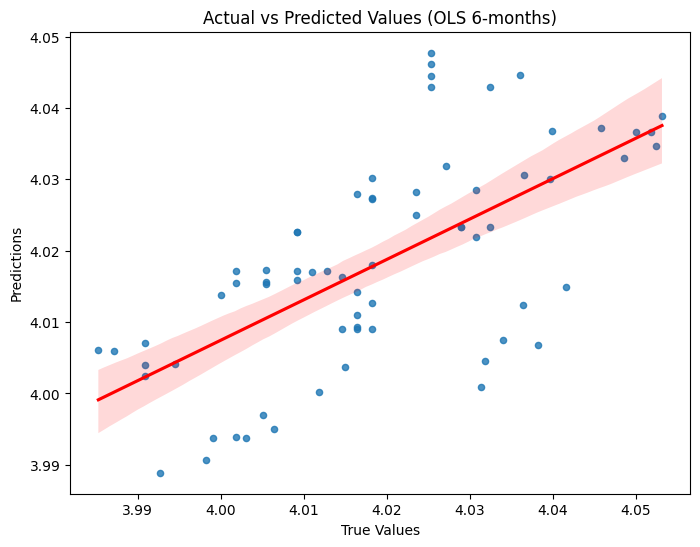

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (OLS 6-months)")
plt.show()

**12-MONTHS**

In [20]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-12M.xlsx")

In [21]:
cdf_12M = df[[ 'PPI','PPI_Lagged','Export_Semis', 'Import_Semis','Employees_Semis', 'RIW_Semis' ]]

In [22]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_12M) * 0.8)

# Split the data into training and testing sets
train = cdf_12M[:last_entry]
test = cdf_12M[last_entry:]

# Train the model using OLS regression
train_x = sm.add_constant(np.asanyarray(train.drop(['PPI'], axis=1)))
train_y = np.asanyarray(train[['PPI']])
model = sm.OLS(train_y, train_x)
regr = model.fit()

# The coefficients
print('Intercept: %.8f' % regr.params[0])
print('Coefficients: ', regr.params[1:])

# Evaluate the model on the testing data
test_x = sm.add_constant(np.asanyarray(test.drop(['PPI'], axis=1)))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

Intercept: 0.23848942
Coefficients:  [ 8.41115259e-01  1.36953693e-01 -4.90024043e-02  6.34031934e-03
 -2.23579407e-04]
Mean absolute error: 0.01508399
Mean squared error: 0.00035427
R2-score: -0.28265759


In [23]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.31313634%
Test MAPE: 0.37509453%


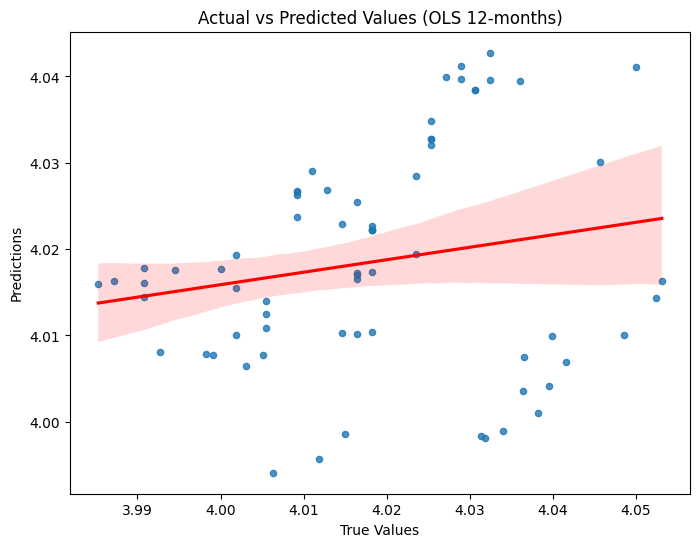

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (OLS 12-months)")
plt.show()

**24-MONTHS**

In [25]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-24M.xlsx")

In [26]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [27]:
cdf_24M = df[['PPI', 'PPI_Lagged','Export_Semis', 'Import_Semis','Employees_Semis','RIW_Semis' ]]

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_24M) * 0.8)

# Split the data into training and testing sets
train = cdf_24M[:last_entry]
test = cdf_24M[last_entry:]

# Train the model using OLS regression
train_x = sm.add_constant(np.asanyarray(train.drop(['PPI'], axis=1)))
train_y = np.asanyarray(train[['PPI']])
model = sm.OLS(train_y, train_x)
regr = model.fit()

# The coefficients
print('Intercept: %.8f' % regr.params[0])
print('Coefficients: ', regr.params[1:])

# Evaluate the model on the testing data
test_x = sm.add_constant(np.asanyarray(test.drop(['PPI'], axis=1)))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

Intercept: 0.56734020
Coefficients:  [ 0.70366561  0.26814564 -0.1156088  -0.00182195  0.01141833]
Mean absolute error: 0.01538052
Mean squared error: 0.00035282
R2-score: -0.33598729


In [29]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.35977179%
Test MAPE: 0.38266368%


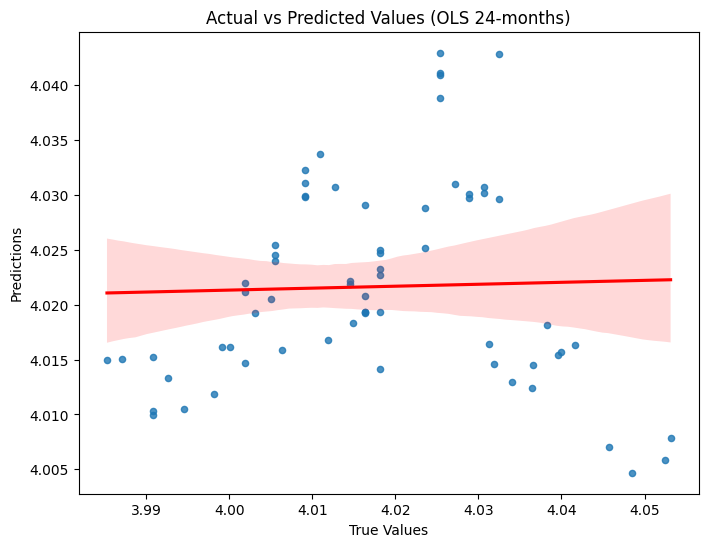

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (OLS 24-months)")
plt.show()